In [2]:
import os 
import re
import shelve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

%matplotlib inline

In [5]:
def get_metrics(which_range, industry, method):
    engine = create_engine("mysql+mysqldb://root:@localhost/forecastmycity")
    con = engine.connect()

    query = 'SELECT * FROM fit_metrics WHERE '\
        'which_range="%s" and industry="%s" and method="%s"' %\
        (which_range, industry, method)

    df = pd.read_sql(query, con=con.connection)

    return df

def get_geo_list(industry):
    engine = create_engine("mysql+mysqldb://danielj:@localhost/forecastmycity")
    con = engine.connect()

    query = 'SELECT DISTINCT(geofips) FROM fit_data WHERE '\
        'industry="%s"' % industry

    df = pd.read_sql(query, con=con.connection)

    return df.values

In [6]:
manf_metrics = {}
manf_metrics['full_AR'] = get_metrics('full', 'manf', 'AR_linreg')
manf_metrics['test_AR'] = get_metrics('test', 'manf', 'AR_linreg')
manf_metrics['full_lr'] = get_metrics('full', 'manf', 'linreg')
manf_metrics['test_lr'] = get_metrics('test', 'manf', 'linreg')

rettrd_metrics = {}
rettrd_metrics['full_AR'] = get_metrics('full', 'rettrd', 'AR_linreg')
rettrd_metrics['test_AR'] = get_metrics('test', 'rettrd', 'AR_linreg')
rettrd_metrics['full_lr'] = get_metrics('full', 'rettrd', 'linreg')
rettrd_metrics['test_lr'] = get_metrics('test', 'rettrd', 'linreg')

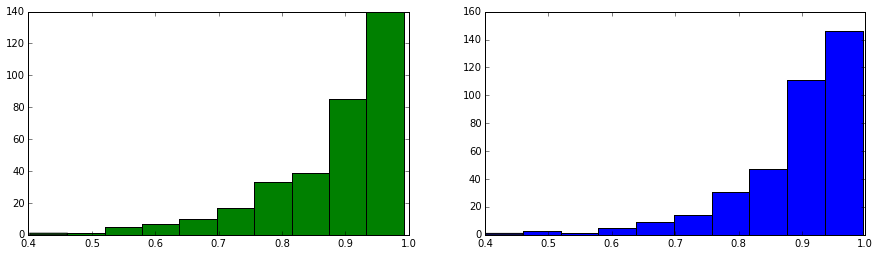

In [7]:
fig, ax = plt.subplots(1,2)
ax[0].hist(manf_metrics['full_AR']['r2'].values, color='green')
ax[1].hist(rettrd_metrics['full_AR']['r2'].values, color='blue')
fig.set_size_inches(15,4)
plt.show()

test_lr stats:
count    338.000000
mean      14.431998
std       32.205727
min        0.277175
25%        2.445611
50%        5.298715
75%       12.970868
max      301.299238
Name: mae, dtype: float64

test_AR stats:
count    338.000000
mean      16.080955
std       47.718751
min        0.231484
25%        1.636093
50%        4.484988
75%       13.667083
max      566.245204
Name: mae, dtype: float64


test_lr stats:
count    368.000000
mean      10.072472
std       37.772904
min        0.248666
25%        1.430295
50%        3.151302
75%        7.530238
max      663.383745
Name: mae, dtype: float64

test_AR stats:
count    368.000000
mean       9.148188
std       19.846391
min        0.164515
25%        1.387708
50%        2.956635
75%        6.941324
max      195.509003
Name: mae, dtype: float64



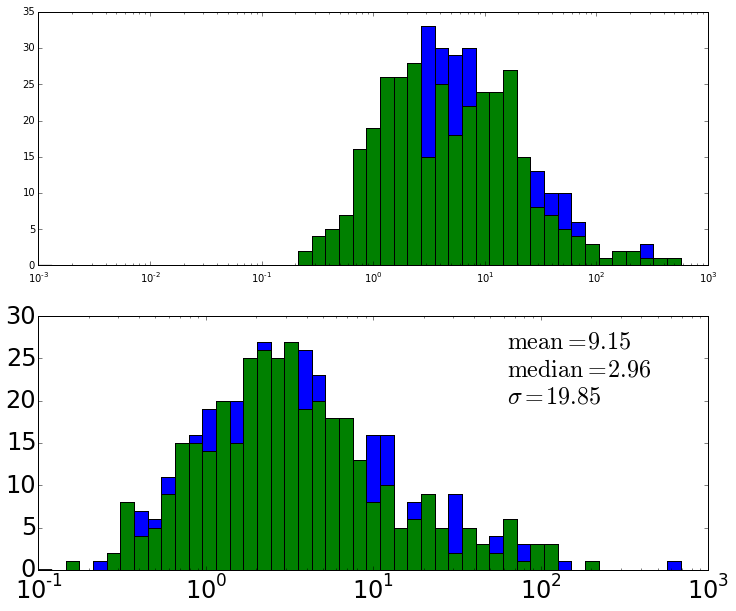

In [26]:
fig, ax = plt.subplots(2,1)
bins = [np.arange(0,10+.2,.2)]

ax[0].hist(manf_metrics['test_lr']['mae']*100, color='blue', bins=np.logspace(-3, 3, 50))
print 'test_lr stats:'
print (manf_metrics['test_lr']['mae']*100).describe()
print ''

ax[0].hist(manf_metrics['test_AR']['mae']*100, color='green', bins=np.logspace(-3, 3, 50))
print 'test_AR stats:'
print (manf_metrics['test_AR']['mae']*100).describe()
print ''

ax[0].set_xscale("log")

print ''

ax[1].hist(rettrd_metrics['test_lr']['mae']*100, color='blue', bins=np.logspace(-1, 3, 50))
print 'test_lr stats:'
print (rettrd_metrics['test_lr']['mae']*100).describe()
print ''


ax[1].hist(rettrd_metrics['test_AR']['mae']*100, color='green', bins=np.logspace(-1, 3, 50))
print 'test_AR stats:'
print (rettrd_metrics['test_AR']['mae']*100).describe()
print ''
mu = (rettrd_metrics['test_AR']['mae']*100).mean()
median = np.median((rettrd_metrics['test_AR']['mae']*100))
sigma = (rettrd_metrics['test_AR']['mae']*100).std()
textstr = '$\mathrm{mean}=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$'%(mu, median, sigma)

ax[1].set_xscale("log")
fig.set_size_inches(12,10)

for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(24)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

plt.gca().text(0.7, 0.95, textstr, transform=plt.gca().transAxes, fontsize=24,
    verticalalignment='top')

plt.show()